#Question 3

In [69]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_instances = 10000
n_features = 6
n_classes = 3

features = np.random.normal(loc=0, scale=1, size=(n_instances, n_features))

features[:, 0] = features[:, 0] * features[:, 1]
features[:, 2] = features[:, 2] + features[:, 3]
features[:, 4] = features[:, 4] - features[:, 5]

target_labels = np.random.randint(0, n_classes, n_instances)

df_classification = pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(n_features)])
df_classification['Target_Label'] = target_labels

df_classification.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target_Label
0,-0.068678,-0.138264,2.170718,1.523030,-0.000016,-0.234137,0
1,1.211943,0.767435,0.073086,0.542560,0.002312,-0.465730,1
2,-0.462942,-1.913280,-2.287205,-0.562288,-1.327078,0.314247,2
3,1.282406,-1.412304,1.239872,-0.225776,1.492276,-1.424748,0
4,-0.060384,0.110923,-0.775296,0.375698,-0.308945,-0.291694,1


#Question 4

In [70]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_instances = 10000
n_features = 6

features = np.random.normal(loc=0, scale=1, size=(n_instances, n_features))

features[:, 0] = features[:, 0] * features[:, 1]
features[:, 2] = features[:, 2] + features[:, 3]
features[:, 4] = features[:, 4] - features[:, 5]

target = 5 * features[:, 0] + 3 * features[:, 1] + 2 * features[:, 2] + np.random.normal(loc=0, scale=0.1, size=n_instances)

df_regression = pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(n_features)])
df_regression['Target'] = target

df_regression.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,-0.068678,-0.138264,2.170718,1.523030,-0.000016,-0.234137,3.591138
1,1.211943,0.767435,0.073086,0.542560,0.002312,-0.465730,8.564479
2,-0.462942,-1.913280,-2.287205,-0.562288,-1.327078,0.314247,-12.594849
3,1.282406,-1.412304,1.239872,-0.225776,1.492276,-1.424748,4.527071
4,-0.060384,0.110923,-0.775296,0.375698,-0.308945,-0.291694,-1.538367


#Question 5

In [68]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_instances = 10000
n_features = 6
n_clusters = 3

features = np.random.normal(loc=0, scale=1, size=(n_instances, n_features))

features[:, 0] = features[:, 0] * features[:, 1]
features[:, 2] = features[:, 2] + features[:, 3]
features[:, 4] = features[:, 4] - features[:, 5]

cluster_labels = np.random.randint(0, n_clusters, n_instances)

df_clustering = pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(n_features)])
df_clustering['Cluster_Label'] = cluster_labels

df_clustering.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Cluster_Label
0,-0.068678,-0.138264,2.170718,1.523030,-0.000016,-0.234137,0
1,1.211943,0.767435,0.073086,0.542560,0.002312,-0.465730,1
2,-0.462942,-1.913280,-2.287205,-0.562288,-1.327078,0.314247,2
3,1.282406,-1.412304,1.239872,-0.225776,1.492276,-1.424748,0
4,-0.060384,0.110923,-0.775296,0.375698,-0.308945,-0.291694,1


#Question 6
###Build a Non Linear Regression model and get 90% Accuracy for the above simulated data in question2. Split the data into 70% and 30% respectively for Training and Testing for model building

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error


np.random.seed(42)
n_instances = 10000
n_features = 6
features = np.random.normal(loc=0, scale=1, size=(n_instances, n_features))

features[:, 0] = features[:, 0] * features[:, 1]
features[:, 2] = features[:, 2] + features[:, 3]
features[:, 4] = features[:, 4] - features[:, 5]

target = 5 * features[:, 0] + 3 * features[:, 1] + 2 * features[:, 2] + np.random.normal(loc=0, scale=0.1, size=n_instances)
df_regression = pd.DataFrame(features, columns=[f"Feature_{i+1}" for i in range(n_features)])
df_regression['Target'] = target
X = df_regression.drop(columns=['Target'])
y = df_regression['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R² (Coefficient of Determination): 0.9690
Mean Squared Error (MSE): 1.2471


#Question 7

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

target_class = pd.cut(df_regression['Target'], bins=3, labels=['Low', 'Medium', 'High'])
X = df_regression.drop(columns='Target')
y = target_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log_reg, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_log_reg, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted')
    ],
    'F1Score': [
        f1_score(y_test, y_pred_log_reg, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
})

metrics_df


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1Score
0,Logistic Regression,0.996333,0.996340,0.996333,0.996312
1,Decision Tree,0.961667,0.962006,0.961667,0.961816
2,Random Forest,0.979000,0.978943,0.979000,0.978855
3,SVM,0.987333,0.987297,0.987333,0.986989
4,KNN,0.952000,0.949854,0.952000,0.950145


#Question 8

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

##csv sheet
df_csv = pd.read_csv('/content/heart_failure_dataset.csv')
print(df_csv.head())
X_csv = df_csv.drop(columns=['DEATH_EVENT'])
y_csv = df_csv['DEATH_EVENT']
X_train_csv, X_test_csv, y_train_csv, y_test_csv = train_test_split(X_csv, y_csv, test_size=0.3, random_state=42)
print(f"Training data size: {X_train_csv.shape}, Test data size: {X_test_csv.shape}")

##excel sheet
df_excel = pd.read_excel('/content/Real_estate_data_set.xlsx')
print(df_excel.head())
X_excel = df_excel.drop(columns=['Y house price of unit area'])
y_excel = df_excel['Y house price of unit area']
X_train_excel, X_test_excel, y_train_excel, y_test_excel = train_test_split(X_excel, y_excel, test_size=0.3, random_state=42)
print(f"Training data size: {X_train_excel.shape}, Test data size: {X_test_excel.shape}")

##json sheet
df_json = pd.read_json('/content/heart_dataset.json')
print(df_json.head())
X_json = df_json.drop(columns=['DEATH_EVENT'])
y_json = df_json['DEATH_EVENT']
X_train_json, X_test_json, y_train_json, y_test_json = train_test_split(X_json, y_json, test_size=0.3, random_state=42)
print(f"Training data size: {X_train_json.shape}, Test data size: {X_test_json.shape}")


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

#Question 9
###Load different datasets from SkLearn library into Colab interface and split them into train and test data. Apply Normalization techniques to convert input data into standardize.

In [5]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

iris = datasets.load_iris()
wine = datasets.load_wine()
cancer = datasets.load_breast_cancer()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
X_wine, y_wine = wine.data, wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
X_cancer, y_cancer = cancer.data, cancer.target
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_iris_scaled = scaler.fit_transform(X_train_iris)
X_test_iris_scaled = scaler.transform(X_test_iris)
X_train_wine_scaled = scaler.fit_transform(X_train_wine)
X_test_wine_scaled = scaler.transform(X_test_wine)
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)


print("Iris Train Data - Mean:", np.mean(X_train_iris_scaled, axis=0), "Std:", np.std(X_train_iris_scaled, axis=0))
print("Wine Train Data - Mean:", np.mean(X_train_wine_scaled, axis=0), "Std:", np.std(X_train_wine_scaled, axis=0))
print("Cancer Train Data - Mean:", np.mean(X_train_cancer_scaled, axis=0), "Std:", np.std(X_train_cancer_scaled, axis=0))





Iris Train Data - Mean: [ 1.71344420e-15 -1.66579713e-15 -2.23894977e-16 -5.73615229e-17] Std: [1. 1. 1. 1.]
Wine Train Data - Mean: [ 8.30321727e-15 -5.73387191e-16  4.72196617e-15  1.22359087e-16
 -3.69813726e-16  1.83343169e-16  9.90795865e-16 -1.01268759e-15
  3.63558948e-16  3.19775505e-16  1.24626444e-15  1.76697467e-16
 -1.56369440e-18] Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cancer Train Data - Mean: [-1.82418183e-15 -3.36348775e-15 -3.60078268e-15 -2.62793450e-16
 -4.26667249e-15  1.00334881e-15  9.78216287e-16  5.78047988e-16
 -5.91846474e-15 -3.34799343e-15  8.53529701e-16 -7.47387500e-16
  7.52023596e-16  1.56163239e-17 -1.45012207e-15 -2.40149780e-15
  2.34732868e-16  3.27942801e-16 -3.14058913e-15  5.05090475e-16
  1.38741277e-15 -8.83298318e-17 -8.64509929e-16 -2.01596981e-15
  1.19318475e-15 -5.90492246e-16 -5.97568393e-16  1.08338247e-16
  4.78859931e-16 -2.32854029e-15] Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

#Question 10

In [86]:
import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

# b) Merge two dataframes (assuming `df1` and `df2` exist)
df1 = df[['PassengerId', 'Pclass', 'Name', 'Sex']]
df2 = df[['PassengerId', 'Age', 'Survived']]
merged_df = pd.merge(df1, df2, on='PassengerId')

# c) Select rows by condition
subset_condition = df[df['Age'] > 30]

# d) Select columns by condition
columns_condition = df.loc[:, df.columns.str.contains('Age|Survived')]

# e) Rename columns
df.rename(columns={'PassengerId': 'ID', 'Pclass': 'Class', 'Sex': 'Gender'}, inplace=True)

# f) Min, max, avg, variance
min_age = df['Age'].min()
max_age = df['Age'].max()
avg_age = df['Age'].mean()
variance_age = df['Age'].var()

# g) Describe
df_description = df.describe()

# h) Size of the dataframe (number of elements)
df_size = df.size

# i) Shape of the dataframe (rows, columns)
df_shape = df.shape

# j) Find unique values in a column
unique_genders = df['Gender'].unique()

# k) Find missing values and fill them with the average or mode
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Filling missing values with mean
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Filling missing values with mode

# l) Replace attribute value name with another name
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# m) Delete columns (check if the column exists before dropping)
if 'Cabin' in df.columns:
    df = df.drop(['Cabin'], axis=1)

# n) Delete rows (Example: drop rows where 'Age' is greater than 70)
df = df.drop(df[df['Age'] > 70].index)

# o) Join datasets (left join, right join)
df1 = df[['ID', 'Class', 'Name', 'Gender']]
df2 = df[['ID', 'Age', 'Survived']]
joined_df = df1.join(df2.set_index('ID'), on='ID', how='left')

# p) Group values by rows
numeric_columns = df.select_dtypes(include='number')

# Group by 'Gender' (not 'Sex' anymore) and calculate mean for numeric columns
grouped_by_gender = df.groupby('Gender')[numeric_columns.columns].mean()

# q) Grouping rows without loops (using vectorized operations)
mean_age_by_gender = df.groupby('Gender')['Age'].mean()

# r) Group rows by time (For this dataset, there's no time column; skipping)

# s) Concatenate datasets
df1 = df[['ID', 'Class', 'Name']]
df2 = df[['Gender', 'Age', 'Survived']]
concatenated_df = pd.concat([df1, df2], axis=1)

# t) Append rows to the dataframe using pd.concat
new_rows = pd.DataFrame({'ID': [891, 892], 'Class': [3, 1], 'Name': ['John Doe', 'Jane Doe'],
                         'Gender': ['male', 'female'], 'Age': [22, 28], 'Survived': [0, 1]})
df_appended = pd.concat([df, new_rows], ignore_index=True)

# u) Append columns to the dataframe
new_columns = pd.DataFrame({'Fare': [7.25, 71.2833]})
df_appended_columns = pd.concat([df, new_columns], axis=1)

# w) Reorder columns
reordered_df = df[['Survived', 'Name', 'Gender', 'Age', 'Class', 'Embarked']]

# Output some of the results
print("Merged DataFrame:\n", merged_df.head())
print("Subset Condition (Age > 30):\n", subset_condition.head())
print("Grouped by Gender (Mean):\n", grouped_by_gender)
print("Reordered DataFrame:\n", reordered_df.head())
print("Grouped by Gender (Mean of Numeric Columns):\n", grouped_by_gender)


Merged DataFrame:
    PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  Survived  
0    male  22.0         0  
1  female  38.0         1  
2  female  26.0         1  
3  female  35.0         1  
4    male  35.0         0  
Subset Condition (Age > 30):
     PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
4             5         0       3   
6             7         0       1   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. J

#Question 11

tf.Tensor(
[[103.1      100.590004  99.46001  ...  14.96      15.96      16.78    ]
 [100.850006 101.34     101.71001  ...  19.69      21.03      21.21    ]
 [ 98.520004 100.770004 101.71001  ...  21.119999  20.96      19.529999]
 ...
 [ 30.960001  33.96      32.95     ...  29.57      29.91      30.66    ]
 [ 32.72      34.97      31.220001 ...  31.07      29.91      29.16    ]
 [ 34.22      36.47      31.970001 ...  35.57      33.660004  32.16    ]], shape=(720, 1280), dtype=float32)


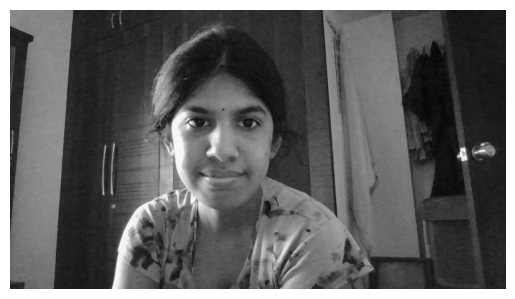

Spectrogram Shape: (1025, 5099)


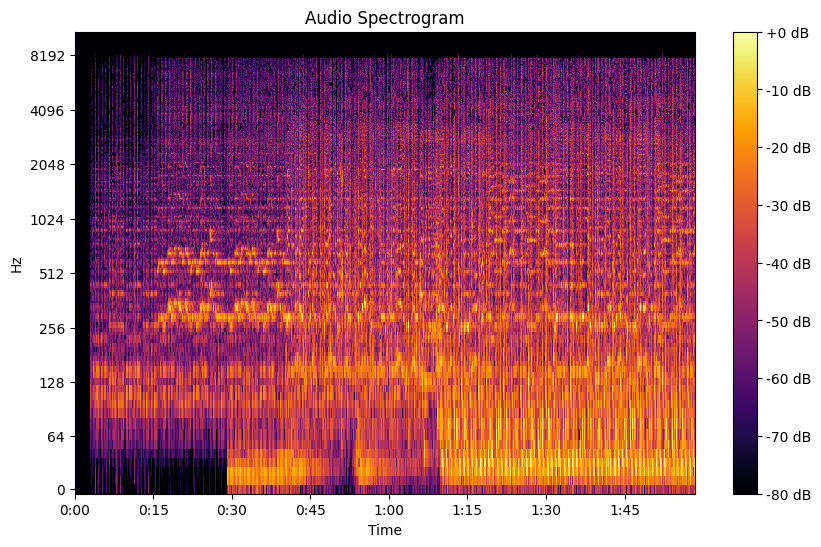

In [88]:
##IMAGE
import numpy as np
import tensorflow as tf
from PIL import Image

x_rgb = np.array(Image.open("/content/image4.jpg")).astype('float32')
weights = tf.constant([0.3, 0.11, 0.34])
grayscale_image = tf.reduce_sum(x_rgb * weights, axis=-1)

print(grayscale_image)

import matplotlib.pyplot as plt
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()



##AUIO
import numpy as np
import tensorflow as tf
import librosa
import librosa.display
import matplotlib.pyplot as plt


audio_path = "/content/audio.18.42_4bd20094-[AudioTrimmer.com].mp3"
y, sr = librosa.load(audio_path, sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

spectrogram_tensor = tf.convert_to_tensor(S_db, dtype=tf.float32)
print(f"Spectrogram Shape: {spectrogram_tensor.shape}")
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Audio Spectrogram')
plt.show()


#Question 12

In [59]:
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import pandas as pd

data = pd.read_csv('/content/synthetic_regression_data.csv')
X = data.drop(columns=['Target'])
y = data['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=10000)
ridge_cv.fit(X_scaled, y)
lasso_cv.fit(X_scaled, y)
ridge_r2 = ridge_cv.score(X_scaled, y)
lasso_r2 = lasso_cv.score(X_scaled, y)
print(f"Ridge Regression R-squared: {ridge_r2}")
print(f"Lasso Regression R-squared: {lasso_r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:2375: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Ridge Regression R-squared: 0.999999731385027
Lasso Regression R-squared: 0.9999997308997667


#Question 13

In [62]:
# Importing required libraries
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

digits = load_digits()
data, labels = digits.data, digits.target
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
clustering_results = {}
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(labels, kmeans_labels)
clustering_results['KMeans'] = {'Silhouette Score': kmeans_silhouette, 'ARI': kmeans_ari}
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
dbscan_silhouette = silhouette_score(data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if len(set(dbscan_labels)) > 1 else None
dbscan_ari = adjusted_rand_score(labels, dbscan_labels)
clustering_results['DBSCAN'] = {'Silhouette Score': dbscan_silhouette, 'ARI': dbscan_ari}
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(data_scaled)
agg_silhouette = silhouette_score(data_scaled, agg_labels)
agg_ari = adjusted_rand_score(labels, agg_labels)
clustering_results['Agglomerative'] = {'Silhouette Score': agg_silhouette, 'ARI': agg_ari}
print("Clustering Metrics:")
print("\nKMeans:")
print(f"  Silhouette Score: {kmeans_silhouette}")
print(f"  Adjusted Rand Index (ARI): {kmeans_ari}")
print("\nDBSCAN:")
print(f"  Silhouette Score: {dbscan_silhouette}")
print(f"  Adjusted Rand Index (ARI): {dbscan_ari}")
print("\nAgglomerative:")
print(f"  Silhouette Score: {agg_silhouette}")
print(f"  Adjusted Rand Index (ARI): {agg_ari}")


Clustering Metrics:

KMeans:
  Silhouette Score: 0.13558208876901615
  Adjusted Rand Index (ARI): 0.5305122615593327

DBSCAN:
  Silhouette Score: 0.3489239250127379
  Adjusted Rand Index (ARI): 0.0072296137807506605

Agglomerative:
  Silhouette Score: 0.12532527779196986
  Adjusted Rand Index (ARI): 0.6643458356002894


#Question 14

In [63]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print(f"Original class distribution: {Counter(y)}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE class distribution: {Counter(y_smote)}")
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
print(f"Undersampled class distribution: {Counter(y_under)}")

smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
print(f"SMOTEENN class distribution: {Counter(y_smoteenn)}")
clf = RandomForestClassifier(random_state=42)
clf.fit(X_smote, y_smote)
y_pred_smote = clf.predict(X_test)
print("\nClassification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

clf.fit(X_under, y_under)
y_pred_under = clf.predict(X_test)
print("\nClassification Report (Undersampling):")
print(classification_report(y_test, y_pred_under))

clf.fit(X_smoteenn, y_smoteenn)
y_pred_smoteenn = clf.predict(X_test)
print("\nClassification Report (SMOTEENN):")
print(classification_report(y_test, y_pred_smoteenn))


Original class distribution: Counter({1: 900, 0: 100})
SMOTE class distribution: Counter({1: 630, 0: 630})
Undersampled class distribution: Counter({0: 70, 1: 70})
SMOTEENN class distribution: Counter({0: 630, 1: 630})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warn


Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.99      1.00       270

    accuracy                           0.99       300
   macro avg       0.97      1.00      0.98       300
weighted avg       0.99      0.99      0.99       300


Classification Report (Undersampling):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.99      1.00       270

    accuracy                           0.99       300
   macro avg       0.97      1.00      0.98       300
weighted avg       0.99      0.99      0.99       300


Classification Report (SMOTEENN):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.99      1.00       270

    accuracy                           0.99       300
   macro avg       0.

#Question 15

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_csv('heart_failure_dataset.csv')
print(data.info())

label_encoder = LabelEncoder()
data['diabetes'] = label_encoder.fit_transform(data['diabetes'])
data['high_blood_pressure'] = label_encoder.fit_transform(data['high_blood_pressure'])
data['smoking'] = label_encoder.fit_transform(data['smoking'])
data['sex'] = label_encoder.fit_transform(data['sex'])

X = data.drop('DEATH_EVENT', axis=1)  # Features
y = data['DEATH_EVENT']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

best_params = grid_search_knn.best_params_
print(f"Best hyperparameters from Grid Search: {best_params}")

knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                 weights=best_params['weights'],
                                 metric=best_params['metric'])

knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", cm)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
Best hyperpar

#Question 16

Best hyperparameters from Grid Search: {'svm__C': 1, 'svm__class_weight': None, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

SVM Accuracy: 0.8

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60


SVM Confusion Matrix:
 [[33  2]
 [10 15]]

Number of Support Vectors: 92


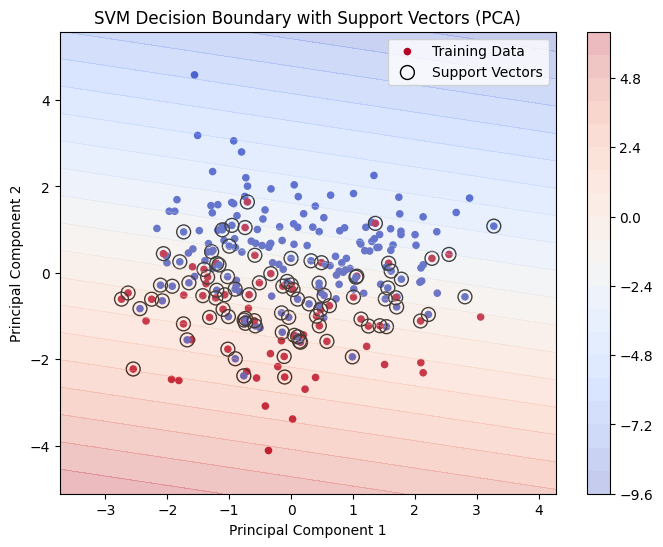

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

data = pd.read_csv('heart_failure_dataset.csv')
data = data.dropna()
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']
categorical_cols = ['diabetes', 'high_blood_pressure', 'smoking', 'sex']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
pipeline = Pipeline(steps=[('scaler', scaler), ('svm', SVC(probability=True))])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__class_weight': ['balanced', None]
}
grid_search_svm = GridSearchCV(pipeline, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

best_model = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_
print(f"Best hyperparameters from Grid Search: {best_params_svm}")

best_model.fit(X_train, y_train)

y_pred_svm = best_model.predict(X_test)
y_prob_svm = best_model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Accuracy:", accuracy)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\nSVM Confusion Matrix:\n", cm)

svm_model = best_model.named_steps['svm']
support_vectors = svm_model.support_vectors_
print(f"\nNumber of Support Vectors: {support_vectors.shape[0]}")

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
support_vectors_pca = pca.transform(support_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', s=20, label='Training Data')
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], edgecolors='k', facecolors='none', s=100, label='Support Vectors')

xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1, 100),
                     np.linspace(X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid)

Z = svm_model.decision_function(grid_original)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3)
plt.colorbar()
plt.title("SVM Decision Boundary with Support Vectors (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

#Question 17

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import seaborn as sns
df = sns.load_dataset('titanic')

df = df.dropna(subset=['age', 'embarked', 'sex', 'pclass', 'survived'])

X = df[['age', 'embarked', 'sex', 'pclass']]
y = df['survived']

categorical_cols = ['embarked', 'sex']
numerical_cols = ['age', 'pclass']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

new_tuple = pd.DataFrame({'age': [25], 'embarked': ['C'], 'sex': ['male'], 'pclass': [3]})

predicted_class = model.predict(new_tuple)
predicted_proba = model.predict_proba(new_tuple)

print(f"Predicted class: {predicted_class[0]}")
print(f"Predicted probabilities: {predicted_proba[0]}")


Predicted class: 0
Predicted probabilities: [0.98 0.02]
